<a href="https://colab.research.google.com/github/Jukpa/PerfectGuide/blob/master/ch07_regression_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7장 선형회귀 모델
## 7.9 프로그램 구현

In [156]:
# 필요 라이브러리 선언
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [157]:
# PDF 출력
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

<ipython-input-157-324a830845c1>:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png', 'pdf')


In [158]:
import pandas as pd
import numpy as np
data_url = "http://lib.stat.cmu.edu/datasets/boston"  # 데이터셋이 있는 url을 저장
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None) # 판다스의 read_csv를 통해 csv파일을 데이터프레임으로 불러옴 이때 sep을 통해 공백을 구분자로 지정, skiprows를 통해 첫행부터 22번째 행까지를 생략해서 가져옴, header를 없음으로 설정하여 가져온 첫 행부터 데이터로 사용
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])  # raw_df 데이터 값의 짝수 행의의 모든 열 데이터와 raw_df 데이터 값의 홀수 행의의 0,1열의 데이터를 수평으로 붙여서 data 변수에 저장함
target = raw_df.values[1::2, 2] # raw_df 데이터 값의 홀수 행의 2열 데이터를 target 변수에 저장함
feature_names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'] # 특성 이름들을 리스트 형태로 저장

x_org = data # original x
yt = target  # true y
x_data = x_org[:,5] # RM
x_data =x_data.reshape(x_data.shape[0],1) # Reshape
x = np.insert(x_data, 0, 1.0, axis=1) # Add a bias
x_org_df = pd.DataFrame(x_org)   # x_org를 데이터 프레임으로 변환
x_org_df.columns = [feature_names]  # x_org_df의 특성 이름들을 위에 저장해놓은 리스트로 대체


In [159]:
x_org_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [160]:
x_data[:5]    # x_data의 ndarray의 0번째 원소부터 4번째 원소까지 슬라이싱
x_data.shape  # x_data의 차원 확인


(506, 1)

In [161]:
type(target)  # target의 type확인
target.shape  # target의 차원 확인

(506,)

In [162]:
# 입력 데이터 x를 표시 (더미 변수 포함)
print(x.shape)
print(x[:5,:])  # 행은 0행부터 4행까지, 열은 전체를 슬라이싱

(506, 2)
[[1.    6.575]
 [1.    6.421]
 [1.    7.185]
 [1.    6.998]
 [1.    7.147]]


In [163]:
# 정답값 yt를 표시
print(yt[:5])

[24.  21.6 34.7 33.4 36.2]


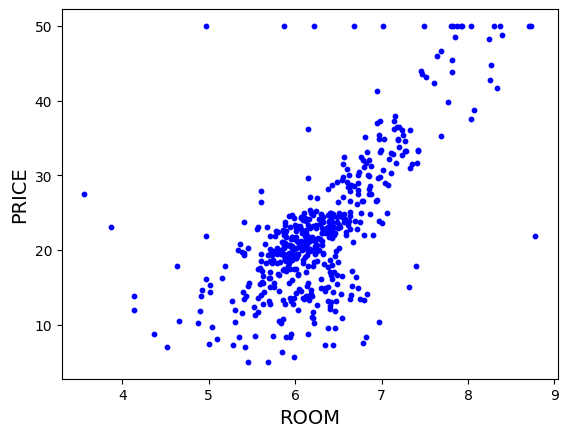

In [164]:
# 산점도를 표시
plt.scatter(x[:,1], yt, s=10, c='b')
plt.xlabel('ROOM', fontsize=14)
plt.ylabel('PRICE', fontsize=14)
plt.show()

In [165]:
# 예측함수 (1, x)의 값에서 예측값 yp를 계산
def pred(x, w):
    return(x @ w)

In [166]:
# 초기화 처리

# 데이터 전체 건수
M = x.shape[0]

# 입력 데이터의 차수 (더미 변수 포함)
D = x.shape[1]

# 반복 횟수
iters = 50000

# 학습률
alpha = 0.01

# 가중치 벡터의 초깃값 (모든 값을 1로 한다)
w = np.ones(D)

# 평가 결과 기록 (손실함수의 값만 기록)
history = np.zeros((0,2))

In [167]:
# 반복 루프
for k in range(iters):
    
    # 예측값 계산 (7.8.1)
    yp = pred(x, w)
    
    # 오차 계산 (7.8.2)
    yd = yp - yt
    
    # 경사하강법 적용 (7.8.4)
    w = w - alpha * (x.T @ yd) / M
    
    # 학습 곡선을 그리기 위한 데이터 계산 및 저장
    if (k % 100 == 0):
        # 손실함숫값의 계산 (7.6.1)
        loss = np.mean(yd ** 2) / 2
        # 계산 결과의 기록
        history = np.vstack((history, np.array([k, loss])))
        # 화면 표시
        print( "iter = %d loss = %f" % (k, loss))

iter = 0 loss = 154.224934
iter = 100 loss = 29.617518
iter = 200 loss = 29.431766
iter = 300 loss = 29.250428
iter = 400 loss = 29.073399
iter = 500 loss = 28.900577
iter = 600 loss = 28.731861
iter = 700 loss = 28.567154
iter = 800 loss = 28.406360
iter = 900 loss = 28.249388
iter = 1000 loss = 28.096145
iter = 1100 loss = 27.946544
iter = 1200 loss = 27.800498
iter = 1300 loss = 27.657922
iter = 1400 loss = 27.518733
iter = 1500 loss = 27.382852
iter = 1600 loss = 27.250200
iter = 1700 loss = 27.120700
iter = 1800 loss = 26.994277
iter = 1900 loss = 26.870858
iter = 2000 loss = 26.750372
iter = 2100 loss = 26.632749
iter = 2200 loss = 26.517921
iter = 2300 loss = 26.405821
iter = 2400 loss = 26.296385
iter = 2500 loss = 26.189549
iter = 2600 loss = 26.085252
iter = 2700 loss = 25.983433
iter = 2800 loss = 25.884034
iter = 2900 loss = 25.786997
iter = 3000 loss = 25.692265
iter = 3100 loss = 25.599784
iter = 3200 loss = 25.509501
iter = 3300 loss = 25.421363
iter = 3400 loss = 25.335

In [168]:
# 최종 손실함수 초깃값, 최종값
print('손실함수 초깃값: %f' % history[0,1])
print('손실함수 최종값: %f' % history[-1,1])

손실함수 초깃값: 154.224934
손실함수 최종값: 21.800325


In [169]:
# 다음 직선을 그리기 위한 좌푯값 계산
xall = x[:,1].ravel()
xl = np.array([[1, xall.min()],[1, xall.max()]])
yl = pred(xl, w)

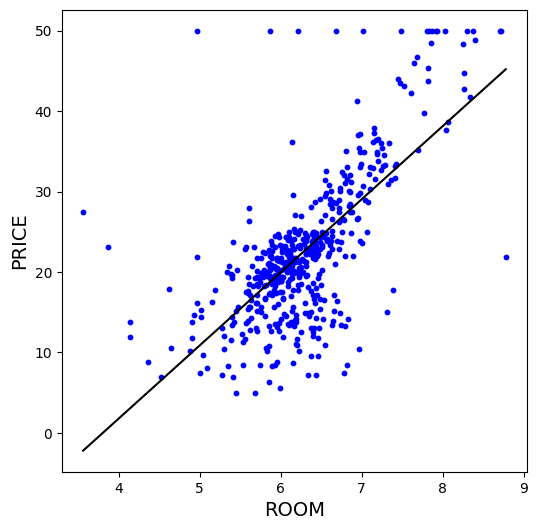

In [170]:
# 산점도와 회귀 직선 그리기
plt.figure(figsize=(6,6))
plt.scatter(x[:,1], yt, s=10, c='b')  # x열은 x데이터의 모든 행, 1열 데이터를 가져옴, 색깔은 파란색으로 표현
plt.xlabel('ROOM', fontsize=14)   # x축이름을 ROOM으로 설정
plt.ylabel('PRICE', fontsize=14)  # y축이름을 PRICE으로 설정
plt.plot(xl[:,1], yl, c='k')
plt.show()

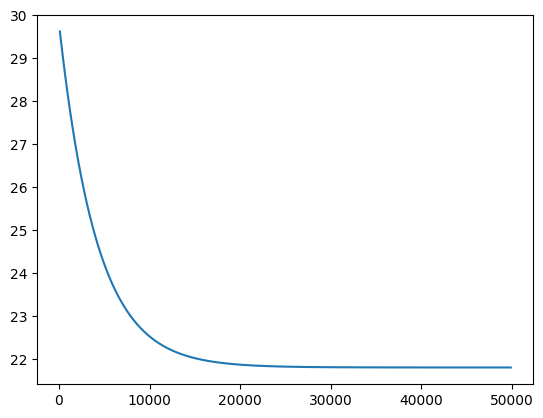

In [171]:
# 학습 곡선을 표시 (첫 1개분 제외)
plt.plot(history[1:,0], history[1:,1])
plt.show()

## 7.10 다중회귀 모델로 확장

In [172]:
# 열(LSTAT: 저소득층 비율) 추가
x_add = x_org_df.loc[:,'LSTAT'] # x_org_df 데이터프레임에서 LSTAT열의 데이터를 가져와 x_add에 저장
x2 = np.hstack((x, x_add))    # x와 x_add를 나란히 붙임
print(x2.shape) # x2의 모양 출력



(506, 3)


In [173]:
# 입력 데이터 x를 표시 (더미 데이터 포함)
print(x2[:5, :])

[[1.    6.575 4.98 ]
 [1.    6.421 9.14 ]
 [1.    7.185 4.03 ]
 [1.    6.998 2.94 ]
 [1.    7.147 5.33 ]]


In [174]:
# 초기화 처리

# 데이터 전체 건수
M = x2.shape[0]

# 입력 데이터의 차원 수 (더미 변수 포함)
D = x2.shape[1]

# 반복 횟수
iters = 50000

# 학습률
alpha = 0.01

# 가중치 벡터의 초깃값 (모든 값을 1로 한다)
w = np.ones(D)

# 평가 결과 기록 (손실함수의 값만 기록)
history = np.zeros((0,2))

In [175]:
# 반복 루프
for k in range(iters):
    
    # 예측값 계산 (7.8.1)
    yp = pred(x2, w)
    
    # 오차 계산 (7.8.2)
    yd = yp - yt
    
    # 경사하강법 적용 (7.8.4)
    w = w - alpha * (x2.T @ yd) / M
    
    # 학습 곡선 그리기용 데이터의 계산과 저장
    if (k % 100 == 0):
        # 손실함숫값의 계산 (7.6.1)
        loss = np.mean(yd ** 2) / 2
        # 계산 결과의 기록
        history = np.vstack((history, np.array([k, loss])))
        # 화면 표시
        print( "iter = %d loss = %f" % (k, loss))

iter = 0 loss = 112.063982
iter = 100 loss = 3753823486849654538960539484160.000000
iter = 200 loss = 2655334090092048840304997303457399619333641481694889411346432.000000
iter = 300 loss = 1878297995285389845771871419740313448531353246802527452461280621621659241714209067974524928.000000
iter = 400 loss = 1328647635059328515131961917958233260010110874734494815182181913568993750919607000530712562926733207758140202205197631488.000000
iter = 500 loss = 939842635502848959802051905083333893189693285496059755389148058019690357736842983091667264575645792135994156419976659397682157829724819024732452028416.000000
iter = 600 loss = 664814474659043143721802884115979632987110146028734825208170044266817116202120531605157962210827793933144596617956699525450809534261818804738123510745485935010887781352757771894784.000000
iter = 700 loss = 470268392835468718497818789065486667296912217118110657452672825380115570246604296497646521595465470424174214614615620361523511994757143889404586660244263088322174256

<ipython-input-175-af2bdf1cb2b5>:16: RuntimeWarning: overflow encountered in square
  loss = np.mean(yd ** 2) / 2
<ipython-input-175-af2bdf1cb2b5>:11: RuntimeWarning: overflow encountered in matmul
  w = w - alpha * (x2.T @ yd) / M
<ipython-input-175-af2bdf1cb2b5>:11: RuntimeWarning: invalid value encountered in subtract
  w = w - alpha * (x2.T @ yd) / M


iter = 6400 loss = nan
iter = 6500 loss = nan
iter = 6600 loss = nan
iter = 6700 loss = nan
iter = 6800 loss = nan
iter = 6900 loss = nan
iter = 7000 loss = nan
iter = 7100 loss = nan
iter = 7200 loss = nan
iter = 7300 loss = nan
iter = 7400 loss = nan
iter = 7500 loss = nan
iter = 7600 loss = nan
iter = 7700 loss = nan
iter = 7800 loss = nan
iter = 7900 loss = nan
iter = 8000 loss = nan
iter = 8100 loss = nan
iter = 8200 loss = nan
iter = 8300 loss = nan
iter = 8400 loss = nan
iter = 8500 loss = nan
iter = 8600 loss = nan
iter = 8700 loss = nan
iter = 8800 loss = nan
iter = 8900 loss = nan
iter = 9000 loss = nan
iter = 9100 loss = nan
iter = 9200 loss = nan
iter = 9300 loss = nan
iter = 9400 loss = nan
iter = 9500 loss = nan
iter = 9600 loss = nan
iter = 9700 loss = nan
iter = 9800 loss = nan
iter = 9900 loss = nan
iter = 10000 loss = nan
iter = 10100 loss = nan
iter = 10200 loss = nan
iter = 10300 loss = nan
iter = 10400 loss = nan
iter = 10500 loss = nan
iter = 10600 loss = nan
iter

In [176]:
# 초기화 처리 (매개변수를 적절한 값으로 변경)

# 데이터 전체 건수
M = x2.shape[0]

# 입력 데이터의 차원 수 (더미 변수를 포함)
D = x2.shape[1]

# 반복 횟수
#iters = 50000
iters = 2000

# 학습률
#alpha = 0.01
alpha = 0.001

# 가중치 벡터의 초깃값 (모든 값을 1로 한다)
w = np.ones(D)

# 평가 결과 기록 (손실함수의 값만 기록)
history = np.zeros((0,2))

In [177]:
# 반복 루프
for k in range(iters):
    
    # 예측값 계산 (7.8.1)
    yp = pred(x2, w)
    
    # 오차 계산 (7.8.2)
    yd = yp - yt
    
    # 경사하강법 적용 (7.8.4)
    w = w - alpha * (x2.T @ yd) / M
    
    # 학습 곡선 그리기용 데이터의 계산과 저장
    if (k % 100 == 0):
        # 손실함숫값의 계산 (7.6.1)
        loss = np.mean(yd ** 2) / 2
        # 계산 결과의 기록
        history = np.vstack((history, np.array([k, loss])))
        # 화면 표시
        print( "iter = %d loss = %f" % (k, loss))

iter = 0 loss = 112.063982
iter = 100 loss = 25.358934
iter = 200 loss = 16.391055
iter = 300 loss = 15.403015
iter = 400 loss = 15.294135
iter = 500 loss = 15.282114
iter = 600 loss = 15.280764
iter = 700 loss = 15.280589
iter = 800 loss = 15.280544
iter = 900 loss = 15.280514
iter = 1000 loss = 15.280485
iter = 1100 loss = 15.280456
iter = 1200 loss = 15.280428
iter = 1300 loss = 15.280399
iter = 1400 loss = 15.280371
iter = 1500 loss = 15.280342
iter = 1600 loss = 15.280314
iter = 1700 loss = 15.280285
iter = 1800 loss = 15.280257
iter = 1900 loss = 15.280228


In [178]:
# 최종 손실함수 초깃값과 최종값
print('손실함수 초깃값: %f' % history[0,1])
print('손실함수 최종값: %f' % history[-1,1])

손실함수 초깃값: 112.063982
손실함수 최종값: 15.280228


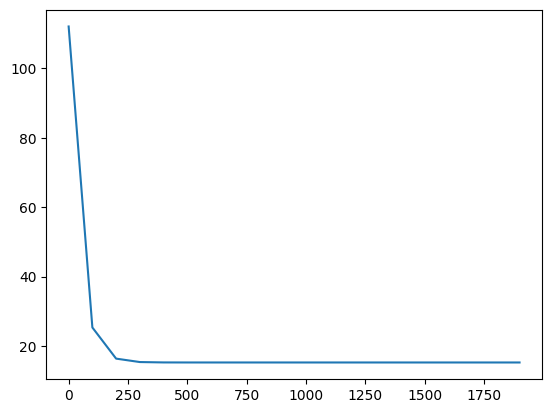

In [179]:
# 학습 곡선을 표시(처음 10개분 제외)
plt.plot(history[:,0], history[:,1])
plt.show()